In [2]:
from sklearn.model_selection import (
    TimeSeriesSplit,
    KFold,
    ShuffleSplit,
    StratifiedKFold,
    GroupShuffleSplit,
    GroupKFold,
    StratifiedShuffleSplit,
    StratifiedGroupKFold,
)

ImportError: cannot import name 'StratifiedGroupKFold' from 'sklearn.model_selection' (c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\__init__.py)

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [55]:
rng = np.random.RandomState(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 5

In [56]:
# Generate the class/group data
n_points = 100
X = rng.randn(100, 10)

percentiles_classes = [0.1, 0.3, 0.6]
y = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

# Generate uneven groups
group_prior = rng.dirichlet([2] * 10)
groups = np.repeat(np.arange(10), rng.multinomial(100, group_prior))

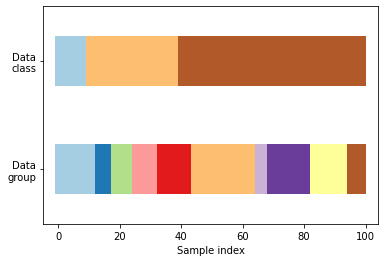

In [57]:
def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(
        range(len(groups)),
        [0.5] * len(groups),
        c=groups,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.scatter(
        range(len(groups)),
        [3.5] * len(groups),
        c=classes,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.set(
        ylim=[-1, 5],
        yticks=[0.5, 3.5],
        yticklabels=["Data\ngroup", "Data\nclass"],
        xlabel="Sample index",
    )


visualize_groups(y, groups, "no groups")

In [62]:
def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) +  ["class", "group"]


    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="Cross-validation(CV) iteration",
        ylim=[n_splits, -0.2],
        xlim=[0, 100],
    )
    #ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

<AxesSubplot:xlabel='Sample index', ylabel='Cross-validation(CV) iteration'>

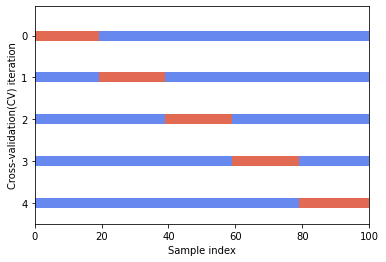

In [63]:
fig, ax = plt.subplots()
cv = KFold(n_splits)
plot_cv_indices(cv, X, y, ax, n_splits)

In [64]:
import pandas as pd

In [66]:
import matplotlib.pyplot as plt
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn import datasets
from sklearn.decomposition import PCA

In [67]:
iris = datasets.load_iris()

In [87]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [94]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [98]:
type(iris)

pandas.core.frame.DataFrame

In [110]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [158]:
iris = datasets.load_iris()

In [159]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [160]:
# Loading the predictor value (y) and remainder of the training dataset (X) as Pandas DataFrames
X = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])
y = pd.DataFrame(data = iris['target'], columns = ['target'])

In [191]:
acc_array = np.zeros(1000)
for i in range(1000):
    # Performing a train_test_split on the dataset
    X_train, X_val, y_train, y_val = train_test_split(X, y)
    # Instantiating a RandomForestClassifier model
    rfc_model = RandomForestClassifier()
    # Fitting the X_train and y_train datasets to the RandomForestClassifier model
    rfc_model.fit(X_train, y_train)
    # Getting inferential predictions for the validation dataset
    val_preds = rfc_model.predict(X_val)
    # Generating validation metrics by comparing the inferential predictions (val_preds) to the actuals (y_val)
    val_accuracy_ho = accuracy_score(y_val, val_preds)
    val_confusion_matrix = confusion_matrix(y_val, val_preds)
    # Printing out the validation metrics
    #print(f'Accuracy Score: {val_accuracy}')
    #print(f'Confusion Matrix: \n{val_confusion_matrix}')
    acc_array[i] = val_accuracy_ho
acc_array

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/730017299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

array([0.94736842, 0.92105263, 0.97368421, 0.94736842, 0.92105263,
       0.92105263, 0.97368421, 0.97368421, 0.92105263, 1.        ,
       0.92105263, 0.94736842, 0.94736842, 1.        , 0.94736842,
       0.97368421, 0.97368421, 0.94736842, 0.94736842, 0.97368421,
       0.97368421, 0.94736842, 0.97368421, 0.94736842, 0.97368421,
       0.92105263, 1.        , 0.94736842, 0.89473684, 0.97368421,
       0.97368421, 0.94736842, 0.97368421, 0.94736842, 0.94736842,
       0.97368421, 0.94736842, 0.94736842, 0.92105263, 0.97368421,
       0.97368421, 0.94736842, 0.92105263, 0.89473684, 0.97368421,
       0.92105263, 0.97368421, 0.94736842, 0.97368421, 1.        ,
       0.97368421, 0.92105263, 0.86842105, 0.97368421, 0.97368421,
       0.97368421, 0.92105263, 0.94736842, 0.89473684, 0.94736842,
       1.        , 0.92105263, 0.92105263, 0.97368421, 0.97368421,
       0.94736842, 0.97368421, 0.94736842, 0.94736842, 0.89473684,
       0.97368421, 1.        , 0.97368421, 1.        , 0.92105

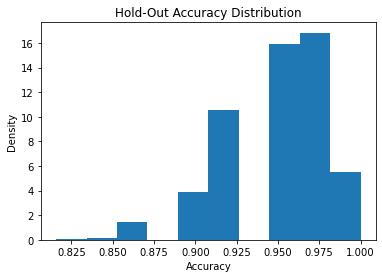

In [201]:
plt.hist(acc_array,density=True)
plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.title('Hold-Out Accuracy Distribution')
plt.show()

In [196]:
sum(acc_array)/1000

0.9496052631579014

In [167]:
# Instantiating the K-Fold cross validation object with 5 folds
k_folds = KFold(n_splits = 10, shuffle = True, random_state = 42)

In [194]:
# Iterating through each of the folds in K-Fold
ave_score_array = np.zeros(1000)
for i in range(1000):
    ave_score = 0
    for train_index, val_index in k_folds.split(X):
    
        # Splitting the training set from the validation set for this specific fold
        X_train, X_val = X.iloc[train_index, :], X.iloc[val_index, :]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Instantiating a RandomForestClassifier model
        rfc_model = RandomForestClassifier()

        # Fitting the X_train and y_train datasets to the RandomForestClassifier model
        rfc_model.fit(X_train, y_train)

        # Getting inferential predictions for the validation dataset
        val_preds = rfc_model.predict(X_val)

        # Generating validation metrics by comparing the inferential predictions (val_preds) to the actuals (y_val)
        val_accuracy = accuracy_score(y_val, val_preds)
        val_confusion_matrix = confusion_matrix(y_val, val_preds)

        # Printing out the validation metrics
        ave_score += val_accuracy
        #print(f'Accuracy Score: {val_accuracy}')
        #print(f'Confusion Matrix: \n{val_confusion_matrix}')
    ave_score_array[i] = ave_score / 10
ave_score_array

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)
/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_1358/3747772734.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

array([0.96      , 0.96      , 0.96      , 0.96      , 0.96      ,
       0.96      , 0.94666667, 0.94666667, 0.95333333, 0.96      ,
       0.96      , 0.96      , 0.95333333, 0.95333333, 0.95333333,
       0.95333333, 0.96      , 0.95333333, 0.96      , 0.96      ,
       0.96      , 0.95333333, 0.96      , 0.96      , 0.96      ,
       0.95333333, 0.96      , 0.96      , 0.95333333, 0.96      ,
       0.95333333, 0.96      , 0.96      , 0.96      , 0.95333333,
       0.95333333, 0.96      , 0.96      , 0.95333333, 0.96      ,
       0.95333333, 0.95333333, 0.96      , 0.96      , 0.95333333,
       0.95333333, 0.96      , 0.96      , 0.96      , 0.96      ,
       0.96      , 0.96      , 0.96      , 0.96      , 0.96      ,
       0.96      , 0.96      , 0.95333333, 0.96      , 0.96      ,
       0.96      , 0.95333333, 0.94666667, 0.96      , 0.96      ,
       0.95333333, 0.96      , 0.95333333, 0.96      , 0.96      ,
       0.96      , 0.96      , 0.95333333, 0.96      , 0.95333

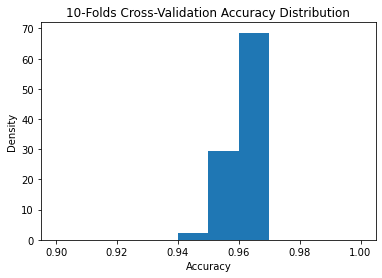

In [200]:
plt.hist(ave_score_array,density = True,range = (0.9,1))
plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.title('10-Folds Cross-Validation Accuracy Distribution')
plt.show()

In [198]:
sum(ave_score_array)/1000

0.9577666666666806